In [1]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_CIFAR10
from src.preprocess import transform_VGGModel
from src.plotting import imshow
from model.VGG import VGG16
from src.train_predict import train, test_classification


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
batch_size = 16

train_set, test_set = load_CIFAR10(transform_VGGModel())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)

In [4]:
classes = train_set.classes


Training

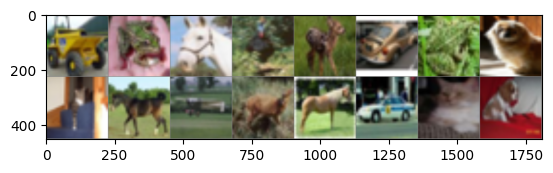

<generator object <genexpr> at 0x00000260C6DEAF80>


In [5]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [6]:
img.shape

torch.Size([16, 3, 224, 224])

In [7]:
model = VGG16(num_class= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [8]:
train(num_loops= 10, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "VGG16_cifar10.pth")

[1,  2000] loss: 2.303
[2,  2000] loss: 2.303


Testing

In [ ]:
model_pred = VGG16(output_feature= len(classes))
model_pred.load_state_dict(torch.load("VGG16_cifar10.pth"))

In [ ]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [ ]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)